<a href="https://colab.research.google.com/github/armandossrecife/lp2024-1/blob/main/mym_lp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa o Dataset

In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv

--2024-07-11 16:48:50--  https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69811 (68K) [text/plain]
Saving to: ‘top-500-movies.csv’

top-500-movies.csv  100%[===================>]  68.17K  --.-KB/s    in 0.01s   

2024-07-11 16:48:50 (5.78 MB/s) - ‘top-500-movies.csv’ saved [69811/69811]



# Cria o Dataframe principal

In [ ]:
import pandas as pd

df_movies = pd.read_csv('top-500-movies.csv')
df_movies.head(3)

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


## Ajusta as colunas para os devidos formatos numéricos e de data

In [ ]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['theaters'] = pd.to_numeric(df_movies['theaters'], errors='coerce')
df_movies['runtime'] = pd.to_numeric(df_movies['runtime'], errors='coerce')
df_movies['year'] = pd.to_numeric(df_movies['year'], errors='coerce')

## Cria um novo dataframe "limpo"

- Remove os valores duplicados
- Remove os valores nulos

In [ ]:
df_cleaned = df_movies.dropna(subset=['release_date', 'opening_weekend','mpaa', 'genre', 'theaters', 'runtime', 'year'])


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rank             474 non-null    int64         
 1   release_date     474 non-null    datetime64[ns]
 2   title            474 non-null    object        
 3   url              474 non-null    object        
 4   production_cost  474 non-null    int64         
 5   domestic_gross   474 non-null    int64         
 6   worldwide_gross  474 non-null    int64         
 7   opening_weekend  474 non-null    float64       
 8   mpaa             474 non-null    object        
 9   genre            474 non-null    object        
 10  theaters         474 non-null    float64       
 11  runtime          474 non-null    float64       
 12  year             474 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 51.8+ KB


## Formata as colunas para valores monetários (currency)

Neste caso em formato de Dólar (milhares separados por ,)

In [ ]:
# Function to format numbers as USD currency
def to_usd_currency(value):
  return f"${value:,.2f}"  # Use f-string for formatting

# Apply the function to the 'production_cost' column
df_cleaned['production_cost_formatted'] = df_cleaned['production_cost'].apply(to_usd_currency)
df_cleaned['domestic_gross_formatted'] = df_cleaned['domestic_gross'].apply(to_usd_currency)
df_cleaned['worldwide_gross_formatted'] = df_cleaned['worldwide_gross'].apply(to_usd_currency)
df_cleaned['opening_weekend_formatted'] = df_cleaned['opening_weekend'].apply(to_usd_currency)

<ipython-input-7-71166440e873>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['production_cost_formatted'] = df_cleaned['production_cost'].apply(to_usd_currency)
<ipython-input-7-71166440e873>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['domestic_gross_formatted'] = df_cleaned['domestic_gross'].apply(to_usd_currency)
<ipython-input-7-71166440e873>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

## Cria uma nova coluna release_year

Baseada apenas no ano da coluna release_date

In [ ]:
# Extract the year using datetime accessor
df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date']).dt.year

<ipython-input-8-d4ee967a7424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date']).dt.year


## Seleciona apenas as colunas numéricas

Para facilitar a análise de correlações

In [ ]:
colunas_numericas = ['rank', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime', 'year']
df_cleaned[colunas_numericas]

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
0,1,400000000,858373000,2797800564,357115007.0,4662.0,181.0,2019.0
1,2,379000000,241071802,1045713802,90151958.0,4164.0,136.0,2011.0
2,3,365000000,459005868,1395316979,191271109.0,4276.0,141.0,2015.0
3,4,306000000,936662225,2064615817,247966675.0,4134.0,136.0,2015.0
4,5,300000000,678815482,2048359754,257698183.0,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...
493,494,92500000,71195053,162839667,19004058.0,3847.0,96.0,2008.0
494,495,92000000,261441092,631441092,70467623.0,3933.0,115.0,2004.0
495,496,92000000,67349198,304249198,24834845.0,3555.0,98.0,2013.0
496,497,92000000,22406362,23911362,9124701.0,2609.0,137.0,2004.0


# 1. Faz o cálculo da correlação entre as colunas numéricas

In [ ]:
correlation_matrix = df_cleaned[colunas_numericas].corr()
correlation_matrix

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
rank,1.000000,-0.920870,-0.474311,-0.508459,-0.518056,-0.538971,-0.221781,-0.303670
production_cost,-0.920870,1.000000,0.506856,0.561523,0.578220,0.497085,0.278572,0.291532
domestic_gross,-0.474311,0.506856,1.000000,0.929819,0.885024,0.542411,0.284350,0.092932
worldwide_gross,-0.508459,0.561523,0.929819,1.000000,0.821172,0.532883,0.335474,0.152554
opening_weekend,-0.518056,0.578220,0.885024,0.821172,1.000000,0.615874,0.261564,0.199897
theaters,-0.538971,0.497085,0.542411,0.532883,0.615874,1.000000,-0.012624,0.491396
runtime,-0.221781,0.278572,0.284350,0.335474,0.261564,-0.012624,1.000000,-0.007508
year,-0.303670,0.291532,0.092932,0.152554,0.199897,0.491396,-0.007508,1.000000


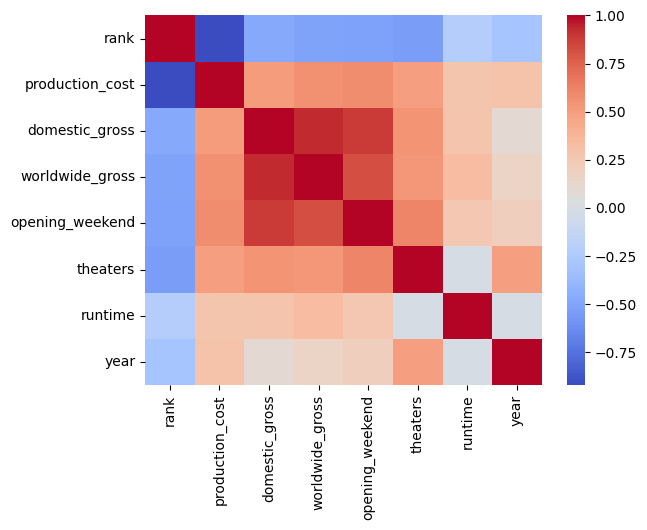

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o heatmap com seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# 2. Sobre os custos de produção (production_cost) e arrecadação de bilheteria mundial (worldwide_gross):

2.1 Mostre os 20 filmes com maior custo de produção.

2.2 Mostre os 20 filmes com maior arrecadação bilheteria mundial

## 2.1 Mostre os 20 filmes com maior custo de produção.

### Ordenar o dataframe por custo de produção em ordem decrescente:

In [ ]:
df_sorted_production_cost = df_cleaned.sort_values(by='production_cost', ascending=False)


In [ ]:
top_20_production_cost = df_sorted_production_cost.head(20)

### Selecionar os 20 primeiros filmes:

In [ ]:
top_20_production_cost[['rank', 'title', 'genre', 'release_date', 'production_cost_formatted', 'worldwide_gross_formatted']]

,rank,title,genre,release_date,production_cost_formatted,worldwide_gross_formatted
0,1,Avengers: Endgame,Action,2019-04-23,"$400,000,000.00","$2,797,800,564.00"
1,2,Pirates of the Caribbean: On Stranger Tides,Adventure,2011-05-20,"$379,000,000.00","$1,045,713,802.00"
2,3,Avengers: Age of Ultron,Action,2015-04-22,"$365,000,000.00","$1,395,316,979.00"
3,4,Star Wars Ep. VII: The Force Awakens,Adventure,2015-12-16,"$306,000,000.00","$2,064,615,817.00"
4,5,Avengers: Infinity War,Action,2018-04-25,"$300,000,000.00","$2,048,359,754.00"
5,6,Pirates of the Caribbean: At World’s End,Adventure,2007-05-24,"$300,000,000.00","$960,996,492.00"
6,7,Justice League,Action,2017-11-13,"$300,000,000.00","$655,945,209.00"
7,8,Spectre,Action,2015-10-06,"$300,000,000.00","$879,500,760.00"
9,10,Star Wars: The Rise of Skywalker,Adventure,2019-12-18,"$275,000,000.00","$1,072,848,487.00"
10,11,Solo: A Star Wars Story,Adventure,2018-05-23,"$275,000,000.00","$393,151,347.00"


## 2.2 Mostre os 20 filmes com maior arrecadação bilheteria mundial

In [ ]:
# Ordenar o dataframe por arrecadação de bilheteria mundial em ordem decrescente:
df_sorted_worldwide_gross = df_cleaned.sort_values(by='worldwide_gross', ascending=False)


In [ ]:
# Selecionar os 20 primeiros filmes:
top_20_worldwide_gross = df_sorted_worldwide_gross.head(20)

In [ ]:
# Exibir as informações dos 20 filmes:
top_20_worldwide_gross[['rank', 'title', 'genre', 'release_date', 'worldwide_gross_formatted', 'production_cost_formatted']]

,rank,title,genre,release_date,worldwide_gross_formatted,production_cost_formatted
24,25,Avatar,Action,2009-12-17,"$2,910,370,905.00","$237,000,000.00"
0,1,Avengers: Endgame,Action,2019-04-23,"$2,797,800,564.00","$400,000,000.00"
48,49,Titanic,Drama,1997-12-18,"$2,207,986,545.00","$200,000,000.00"
3,4,Star Wars Ep. VII: The Force Awakens,Adventure,2015-12-16,"$2,064,615,817.00","$306,000,000.00"
4,5,Avengers: Infinity War,Action,2018-04-25,"$2,048,359,754.00","$300,000,000.00"
46,47,Spider-Man: No Way Home,Action,2021-12-14,"$1,912,775,610.00","$200,000,000.00"
37,38,Jurassic World,Action,2015-06-09,"$1,669,979,967.00","$215,000,000.00"
14,15,The Lion King,Adventure,2019-07-11,"$1,647,778,651.00","$260,000,000.00"
29,30,The Avengers,Action,2012-04-25,"$1,515,100,211.00","$225,000,000.00"
89,90,Furious 7,Action,2015-04-01,"$1,514,553,486.00","$190,000,000.00"


# 3. Sobre os gêneros dos filmes analisados:

3.1 Quais são os gêneros dos 20 filmes com maior custo de produção?

3.2 Quais são os gêneros dos 20 filmes com maior bilheteria mundial?

## 3.1 Quais são os gêneros dos 20 filmes com maior custo de produção?

In [ ]:
# Obter os 20 filmes com maior custo de produção:
top_20_production_cost = df_cleaned.sort_values(by='production_cost', ascending=False).head(20)

In [ ]:
# Exibir os generos
top_20_production_cost['genre'].value_counts()

genre
Adventure    11
Action        8
Musical       1
Name: count, dtype: int64

## 3.2 Quais são os gêneros dos 20 filmes com maior bilheteria mundial?

In [ ]:
# Obter os 20 filmes com maior bilheteria mundial:
top_20_worldwide_gross = df_cleaned.sort_values(by='worldwide_gross', ascending=False).head(20)

In [ ]:
top_20_worldwide_gross['genre'].value_counts()

genre
Action       11
Adventure     6
Musical       2
Drama         1
Name: count, dtype: int64

# 4. Qual é a média de arrecadação dos 20 filmes com maior bilheteria mundial?

In [ ]:
top_20_worldwide_gross = df_cleaned.sort_values(by='worldwide_gross', ascending=False).head(20)


In [ ]:
average_gross = top_20_worldwide_gross['worldwide_gross'].mean()
print(f"Average gross of the top 20 films: ${average_gross:,.2f}")

Average gross of the top 20 films: $1,683,804,948.85


# 5. Crie um gráfico que represente a distribuição de arrecadação dos 20 filmes com maior bilheteria mundial.

Cada barra do gráfico deve representar o valor de arrecadação de cada filme. Dentro de cada barra deve ser exibido o respectivo valor de arrecadação.

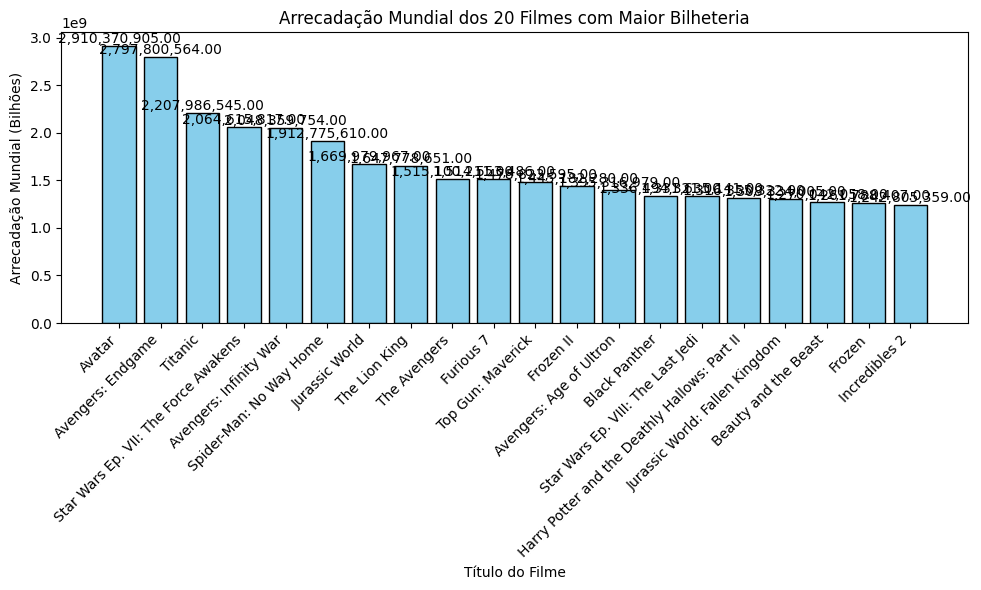

In [ ]:
# Sort by worldwide gross in descending order
top_20_grossing_films = df_cleaned.sort_values(by='worldwide_gross', ascending=False).head(20)

# Extract film titles and gross amounts
film_titles = top_20_grossing_films['title'].to_numpy()
gross_amounts = top_20_grossing_films['worldwide_gross'].to_numpy()

# Create a bar chart with labels
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.xlabel('Título do Filme')
plt.ylabel('Arrecadação Mundial (Bilhões)')
plt.title('Arrecadação Mundial dos 20 Filmes com Maior Bilheteria')
plt.bar(film_titles, gross_amounts, color='skyblue', edgecolor='k')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display gross amounts above each bar
for i, value in enumerate(gross_amounts):
    plt.text(i, value + 0.1, f"{value:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

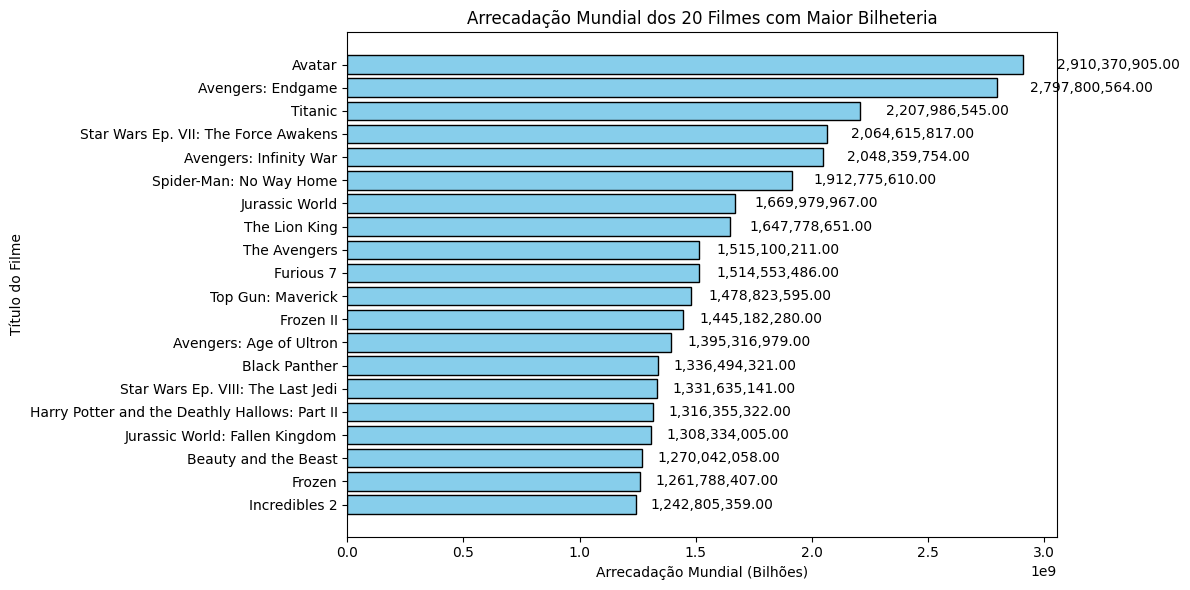

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.barh(film_titles, gross_amounts, color='skyblue', edgecolor='k')

# Display gross amounts above each bar (optional)
for i, value in enumerate(gross_amounts):
    plt.text(value + value * 0.05, i, f"{value:,.2f}", ha='left', va='center')  # Adjust position and alignment

# Set labels and title
plt.xlabel('Arrecadação Mundial (Bilhões)')
plt.ylabel('Título do Filme')  # Swap axis labels for horizontal chart
plt.title('Arrecadação Mundial dos 20 Filmes com Maior Bilheteria')

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Display the chart
plt.tight_layout()
plt.show()

# 6. Crie um gráfico que mostre o percentual de participação dos 20 filmes com maior arrecadação de bilheteria mundial.

Cada setor do gráfico deve representar o valor percentual de participação de cada filme.

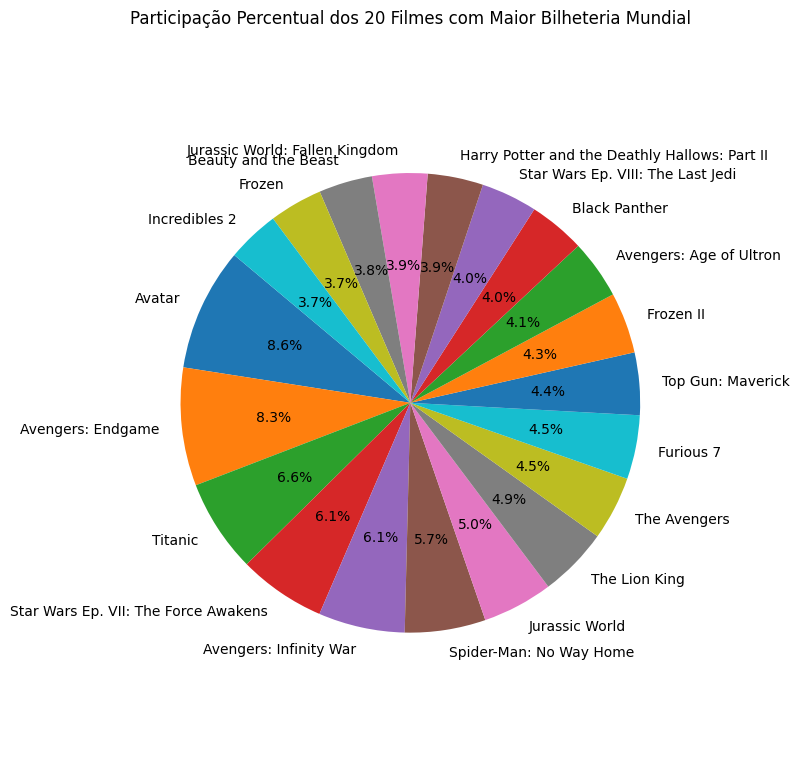

In [ ]:
# Sort by worldwide gross in descending order
top_20_grossing_films = df_cleaned.sort_values(by='worldwide_gross', ascending=False).head(20)

# Calculate total worldwide gross
total_gross = top_20_grossing_films['worldwide_gross'].sum()

# Calculate percentage share for each film
film_shares = (top_20_grossing_films['worldwide_gross'] / total_gross) * 100

# Extract film titles and percentage shares
film_titles = top_20_grossing_films['title'].to_numpy()
percentage_shares = film_shares.to_numpy()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_shares, labels=film_titles, autopct="%1.1f%%", startangle=140)  # Adjust startangle as needed
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.title('Participação Percentual dos 20 Filmes com Maior Bilheteria Mundial')

plt.tight_layout()
plt.show()

# 7. Crie um gráfico de série temporal que mostre a evolução do valor total de arrecadação de bilheteria mundial ao longo dos últimos 25 anos.

Cada ano deve representar o valor total de arrecadação dos filmes do dataset.

In [ ]:
# Filter data for the past 25 years:
# Assuming 'release_date' column is present in the DataFrame
df_filtered = df_cleaned[df_cleaned['release_year'] >= 1997]  # Adjust start year as needed


In [ ]:
# Calculate total worldwide gross per year
year_wise_gross = df_filtered.groupby('release_year')['worldwide_gross'].sum()

In [ ]:
# Prepare data for plotting:
years = year_wise_gross.index.to_numpy()
total_gross = year_wise_gross.to_numpy()


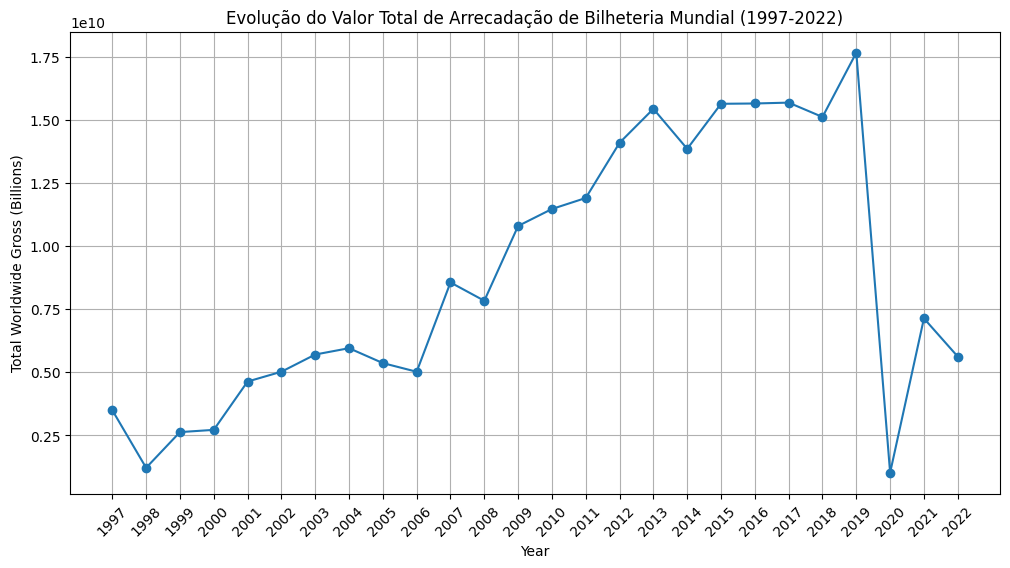

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross (Billions)')
plt.title('Evolução do Valor Total de Arrecadação de Bilheteria Mundial (1997-2022)')
plt.plot(years, total_gross, marker='o', linestyle='-')

# Additional formatting (optional)
plt.grid(True)  # Add grid lines for better readability
plt.xticks(range(1997, 2023))  # Set specific x-axis ticks for each year
plt.xticks(rotation=45)
plt.show()

# 8. Qual é a média de arrecadação de bilheteria mundial dos 20 filmes de ação com maior bilheteria mundial?

In [ ]:
# Filter data for action movies:
action_movies = df_cleaned[df_cleaned['genre'].str.contains('Action', na=False)]  # Assuming 'genre' contains action movies

In [ ]:
# Sort by worldwide gross:
top_20_action_grossing_films = action_movies.sort_values(by='worldwide_gross', ascending=False).head(20)


In [ ]:
# Calculate average gross:
average_gross = top_20_action_grossing_films['worldwide_gross'].mean()
print(f"{average_gross:,.2f}")

1,511,815,901.90


# 9. Qual é a média de custo de produção dos 20 filmes de aventura com maior bilheteria mundial?

In [ ]:
# Filter data for adventure movies:
adventure_movies = df_cleaned[df_cleaned['genre'].str.contains('Adventure', na=False)]  # Assuming 'genre' contains adventure movies


In [ ]:
# Sort by worldwide gross:
top_20_adventure_grossing_films = adventure_movies.sort_values(by='worldwide_gross', ascending=False).head(20)


In [ ]:
# Calculate average production cost:
average_production_cost = top_20_adventure_grossing_films['production_cost'].mean()


In [ ]:
print(f"{average_production_cost:,.2f}")

202,400,000.00


# 10. Crie um gráfico que agrupe os filmes por gênero e mostre o percentual de participação da bilheteria mundial de todos os filmes do dataset por gênero.


In [ ]:
# Calculate genre-wise total gross:
genre_wise_gross = df_cleaned.groupby('genre')['worldwide_gross'].sum()


In [ ]:
# Calculate total worldwide gross:
total_gross = genre_wise_gross.sum()


In [ ]:
# Calculate percentage share:
genre_shares = (genre_wise_gross / total_gross) * 100


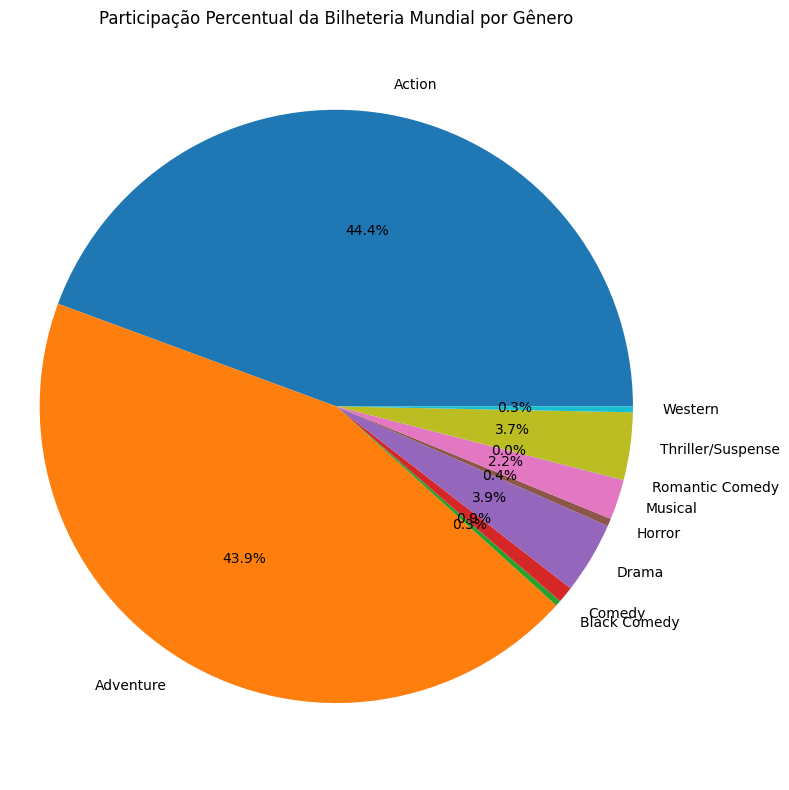

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(genre_shares, labels=genre_wise_gross.index, autopct="%1.1f%%")
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.title('Participação Percentual da Bilheteria Mundial por Gênero')

plt.tight_layout()
plt.show()